In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def deepLearningWithCNN(path, architectures=3, batch_size=32, epochs=20, activation_o='relu', activation_h='relu'):
    Info_String = ''
    try:
        data = pd.read_csv(path)
        data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], errors='coerce')
        data['YEAR'] = data['DATE OCC'].dt.year

        data = data.dropna(subset=['YEAR'])
        train_data = data[data['YEAR'].isin([2021, 2022])]
        test_data = data[data['YEAR'].isin([2023, 2024])]

        X_train = train_data.drop(columns=['Target', 'DATE OCC', 'YEAR']).values
        y_train = train_data['Target'].values
        X_test = test_data.drop(columns=['Target', 'DATE OCC', 'YEAR']).values
        y_test = test_data['Target'].values
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        models = []

        print(architectures)

        i = architectures
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])))
        if i == 1:
            model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation=activation_h))
            model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
            model.add(tf.keras.layers.Flatten())
        elif i == 2:
            model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation=activation_h))
            model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
            model.add(tf.keras.layers.Dropout(0.3))
            model.add(tf.keras.layers.Flatten())
        elif i == 3:
            model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation=activation_h))
            model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
            model.add(tf.keras.layers.Conv1D(128, kernel_size=3, activation=activation_h))
            model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation=activation_o))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        models.append(model)

        for idx, model in enumerate(models, i):
            print(f"\nTraining Architecture {idx} with output activation: {activation_o}, hidden activation: {activation_h} ...")
            history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)
            y_pred = np.argmax(model.predict(X_test), axis=1)
            acc = accuracy_score(y_test, y_pred)
            print(f"Architecture {idx} - Test Accuracy: {acc:.8f}")

            cm = confusion_matrix(y_test, y_pred)
            print(f"Confusion Matrix for Architecture {idx}:")
            print(cm)

            cr = classification_report(y_test, y_pred)
            print(f"Classification Report {idx}")
            print(cr)

            try:
                feature_importances = model.feature_importances_
                importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
                importance_df = importance_df.sort_values(by='Importance', ascending=False)
                plt.figure(figsize=(10, 6))
                sns.barplot(x='Importance', y='Feature', data=importance_df)
                plt.title("Feature Importance")
                plt.show()
            except AttributeError:
                print("\nFeature importance is not applicable for this model setup.")

            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
            disp.plot(cmap='Blues')
            plt.title(f"Confusion Matrix for Architecture {idx}")
            plt.show()

            Info_String += f"Architecture {idx}, Output Activation {activation_o}, Hidden Activation {activation_h}, Accuracy: {acc:.8f}\n {cr}\n"

    except FileNotFoundError:
        print(f"File not found at {path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return Info_String

1
1

Training Architecture 1 with output activation: sigmoid, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7735 - loss: 0.4653 - val_accuracy: 0.8191 - val_loss: 0.4183
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8599 - loss: 0.3374 - val_accuracy: 0.8202 - val_loss: 0.4088
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8610 - loss: 0.3305 - val_accuracy: 0.8182 - val_loss: 0.4153
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8670 - loss: 0.3188 - val_accuracy: 0.8218 - val_loss: 0.4120
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8666 - loss: 0.3166 - val_accuracy: 0.8289 - val_loss: 0.4044
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8676 - loss: 0.3178 - val_accuracy: 0.8214 - val_loss: 0.4137
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8669 - loss: 0.3218 - val_accuracy: 0.8257 - val_loss: 0.4058
Epoch 8/25
666

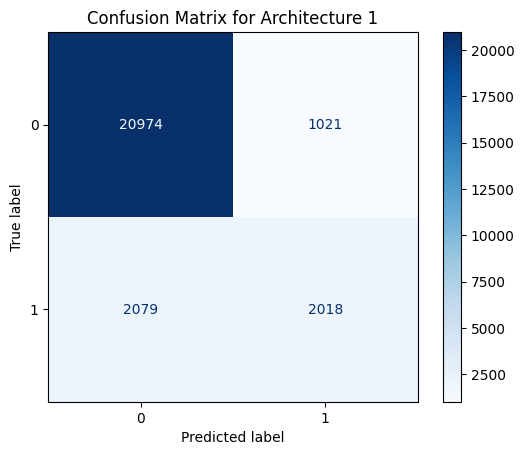

2
2

Training Architecture 2 with output activation: sigmoid, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8065 - loss: 0.4303 - val_accuracy: 0.8242 - val_loss: 0.4008
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8593 - loss: 0.3402 - val_accuracy: 0.8285 - val_loss: 0.3963
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8632 - loss: 0.3304 - val_accuracy: 0.8189 - val_loss: 0.4090
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.3301 - val_accuracy: 0.8302 - val_loss: 0.3978
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8594 - loss: 0.3302 - val_accuracy: 0.8291 - val_loss: 0.3967
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8608 - loss: 0.3311 - val_accuracy: 0.8223 - val_loss: 0.4050
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8618 - loss: 0.3253 - val_accuracy: 0.8249 - val_loss: 0.3986
Epoch 8/25
666

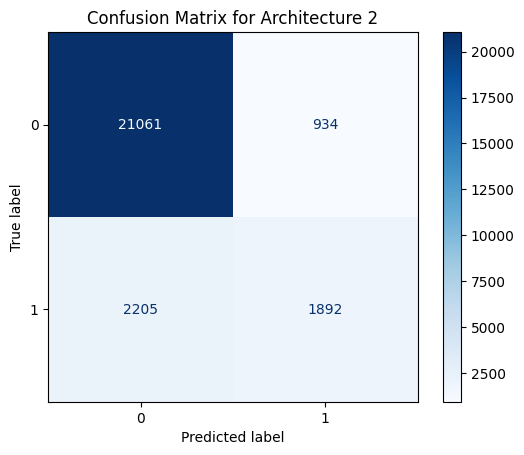

3
3

Training Architecture 3 with output activation: sigmoid, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8082 - loss: 0.4292 - val_accuracy: 0.8223 - val_loss: 0.4010
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8622 - loss: 0.3226 - val_accuracy: 0.8358 - val_loss: 0.3764
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8681 - loss: 0.3139 - val_accuracy: 0.8377 - val_loss: 0.3677
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8657 - loss: 0.3148 - val_accuracy: 0.8356 - val_loss: 0.3694
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8694 - loss: 0.3071 - val_accuracy: 0.8385 - val_loss: 0.3682
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8671 - loss: 0.3129 - val_accuracy: 0.8315 - val_loss: 0.3821
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8651 - loss: 0.3144 - val_accuracy: 0.8283 - val_loss: 0.3966
Epoch 8/25
666

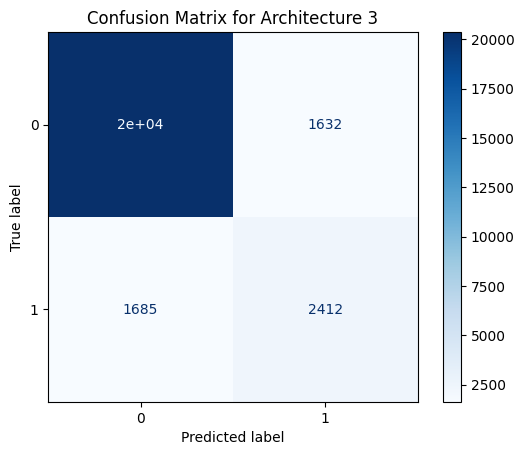

1
1

Training Architecture 1 with output activation: sigmoid, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8157 - loss: 0.4288 - val_accuracy: 0.8122 - val_loss: 0.4185
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8573 - loss: 0.3366 - val_accuracy: 0.8135 - val_loss: 0.4175
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8575 - loss: 0.3359 - val_accuracy: 0.8163 - val_loss: 0.4285
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8630 - loss: 0.3259 - val_accuracy: 0.8186 - val_loss: 0.4280
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8619 - loss: 0.3289 - val_accuracy: 0.8193 - val_loss: 0.4180
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8623 - loss: 0.3281 - val_accuracy: 0.8174 - val_loss: 0.4199
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8646 - loss: 0.3247 - val_accuracy: 0.8161 - val_loss: 0.4252
Epoch 8/25
66

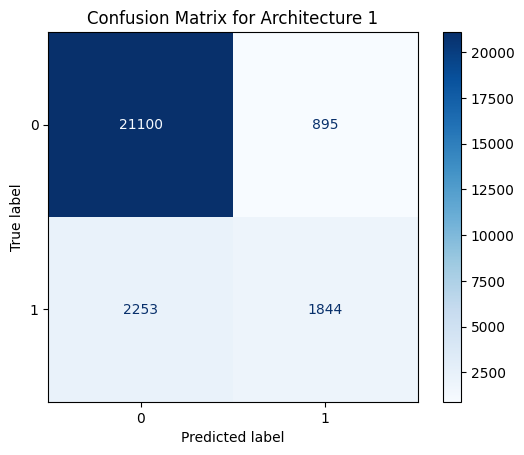

2
2

Training Architecture 2 with output activation: sigmoid, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8048 - loss: 0.4366 - val_accuracy: 0.8214 - val_loss: 0.4014
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8528 - loss: 0.3437 - val_accuracy: 0.8242 - val_loss: 0.3950
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3379 - val_accuracy: 0.8249 - val_loss: 0.3925
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8524 - loss: 0.3454 - val_accuracy: 0.8253 - val_loss: 0.3959
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8601 - loss: 0.3311 - val_accuracy: 0.8240 - val_loss: 0.3919
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8541 - loss: 0.3415 - val_accuracy: 0.8233 - val_loss: 0.3956
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8538 - loss: 0.3404 - val_accuracy: 0.8223 - val_loss: 0.3960
Epoch 8/25
66

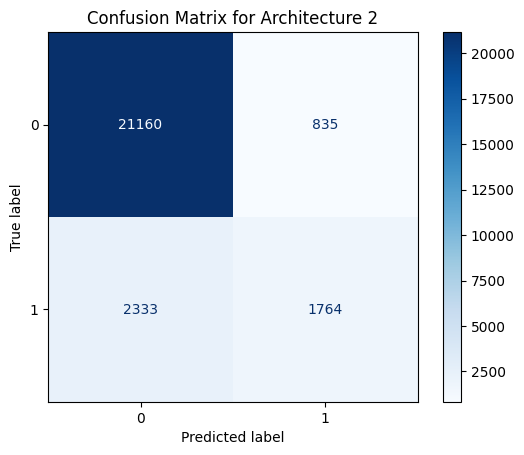

3
3

Training Architecture 3 with output activation: sigmoid, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8205 - loss: 0.4189 - val_accuracy: 0.8283 - val_loss: 0.4121
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8597 - loss: 0.3320 - val_accuracy: 0.8268 - val_loss: 0.3984
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8671 - loss: 0.3196 - val_accuracy: 0.8062 - val_loss: 0.4296
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8636 - loss: 0.3189 - val_accuracy: 0.8186 - val_loss: 0.4383
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8665 - loss: 0.3147 - val_accuracy: 0.8347 - val_loss: 0.3814
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8664 - loss: 0.3114 - val_accuracy: 0.8229 - val_loss: 0.4203
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8673 - loss: 0.3136 - val_accuracy: 0.8236 - val_loss: 0.4018
Epoch 8/25


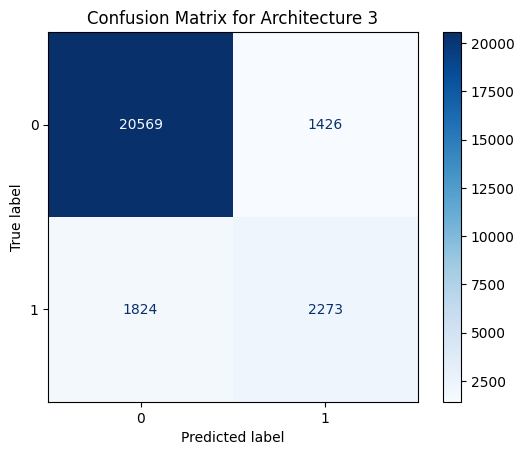

1
1

Training Architecture 1 with output activation: softmax, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7424 - loss: 0.4874 - val_accuracy: 0.8163 - val_loss: 0.4177
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8546 - loss: 0.3397 - val_accuracy: 0.8159 - val_loss: 0.4285
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8624 - loss: 0.3313 - val_accuracy: 0.8187 - val_loss: 0.4212
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3283 - val_accuracy: 0.8251 - val_loss: 0.4004
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8642 - loss: 0.3264 - val_accuracy: 0.8246 - val_loss: 0.4024
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8705 - loss: 0.3101 - val_accuracy: 0.8310 - val_loss: 0.3908
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8639 - loss: 0.3234 - val_accuracy: 0.8266 - val_loss: 0.3991
Epoch 8/25
666

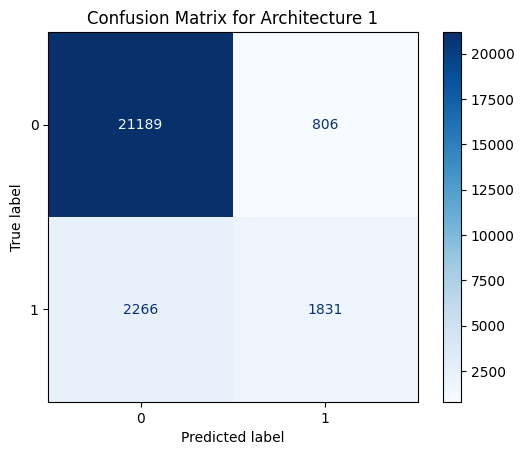

2
2

Training Architecture 2 with output activation: softmax, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7999 - loss: 0.4392 - val_accuracy: 0.8127 - val_loss: 0.4281
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8560 - loss: 0.3413 - val_accuracy: 0.8171 - val_loss: 0.4249
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.3309 - val_accuracy: 0.8204 - val_loss: 0.4157
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8609 - loss: 0.3329 - val_accuracy: 0.8176 - val_loss: 0.4200
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8596 - loss: 0.3317 - val_accuracy: 0.8182 - val_loss: 0.4188
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8632 - loss: 0.3253 - val_accuracy: 0.8167 - val_loss: 0.4175
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8607 - loss: 0.3251 - val_accuracy: 0.8210 - val_loss: 0.4060
Epoch 8/25
666

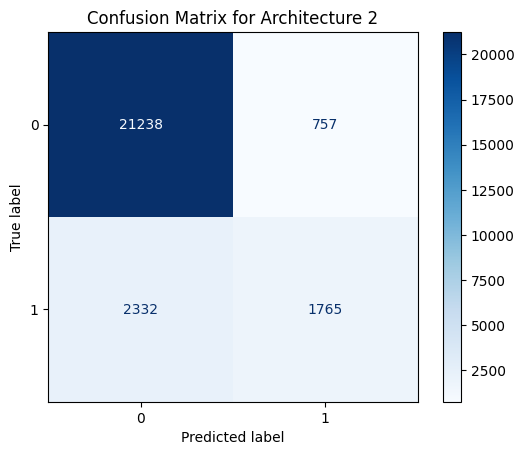

3
3

Training Architecture 3 with output activation: softmax, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8196 - loss: 0.4220 - val_accuracy: 0.8373 - val_loss: 0.3703
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8702 - loss: 0.3131 - val_accuracy: 0.8392 - val_loss: 0.3669
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8651 - loss: 0.3127 - val_accuracy: 0.8387 - val_loss: 0.3654
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8668 - loss: 0.3118 - val_accuracy: 0.8341 - val_loss: 0.3789
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8685 - loss: 0.3143 - val_accuracy: 0.8390 - val_loss: 0.3796
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8671 - loss: 0.3082 - val_accuracy: 0.8304 - val_loss: 0.3721
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8701 - loss: 0.2972 - val_accuracy: 0.8251 - val_loss: 0.3878
Epoch 8/25
666

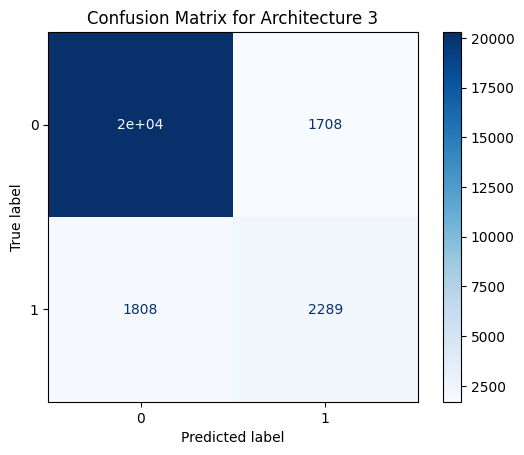

1
1

Training Architecture 1 with output activation: softmax, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7999 - loss: 0.4389 - val_accuracy: 0.8219 - val_loss: 0.4036
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8574 - loss: 0.3360 - val_accuracy: 0.8197 - val_loss: 0.4093
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8619 - loss: 0.3257 - val_accuracy: 0.8304 - val_loss: 0.3867
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8581 - loss: 0.3301 - val_accuracy: 0.8283 - val_loss: 0.3936
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3287 - val_accuracy: 0.8272 - val_loss: 0.3954
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8681 - loss: 0.3182 - val_accuracy: 0.8253 - val_loss: 0.3952
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.3247 - val_accuracy: 0.8227 - val_loss: 0.4003
Epoch 8/25
66

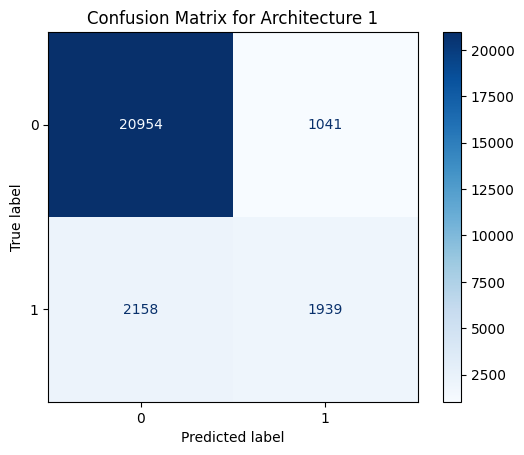

2
2

Training Architecture 2 with output activation: softmax, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7990 - loss: 0.4384 - val_accuracy: 0.8184 - val_loss: 0.4122
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8549 - loss: 0.3410 - val_accuracy: 0.8184 - val_loss: 0.4094
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8519 - loss: 0.3447 - val_accuracy: 0.8144 - val_loss: 0.4234
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8530 - loss: 0.3409 - val_accuracy: 0.8150 - val_loss: 0.4266
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.3391 - val_accuracy: 0.8186 - val_loss: 0.4136
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8573 - loss: 0.3362 - val_accuracy: 0.8189 - val_loss: 0.4169
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8576 - loss: 0.3374 - val_accuracy: 0.8246 - val_loss: 0.4007
Epoch 8/25
66

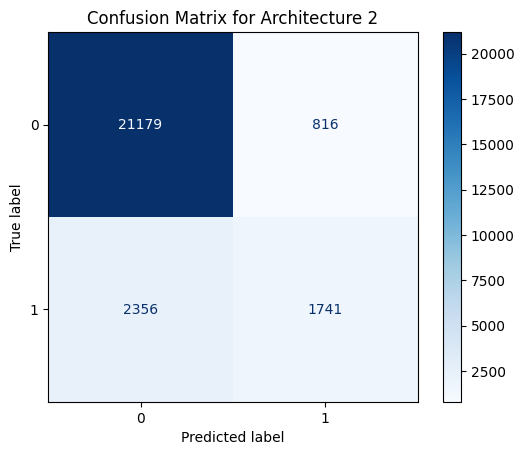

3
3

Training Architecture 3 with output activation: softmax, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8176 - loss: 0.4261 - val_accuracy: 0.8244 - val_loss: 0.4289
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8582 - loss: 0.3257 - val_accuracy: 0.8251 - val_loss: 0.4028
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8616 - loss: 0.3258 - val_accuracy: 0.8249 - val_loss: 0.4284
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8594 - loss: 0.3233 - val_accuracy: 0.8276 - val_loss: 0.3965
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8659 - loss: 0.3134 - val_accuracy: 0.8197 - val_loss: 0.4138
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8626 - loss: 0.3226 - val_accuracy: 0.8274 - val_loss: 0.3787
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8664 - loss: 0.3130 - val_accuracy: 0.8315 - val_loss: 0.3830
Epoch 8/25
66

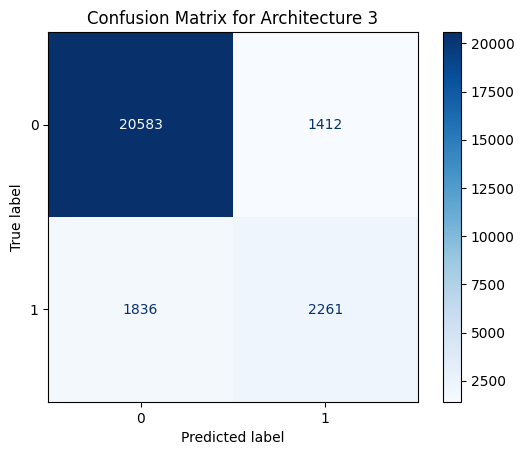

1
1

Training Architecture 1 with output activation: tanh, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5544 - loss: 0.9044 - val_accuracy: 0.7569 - val_loss: 0.6931
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7550 - loss: 0.6933 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5415 - loss: 0.6931 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5499 - loss: 0.6931 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5388 - loss: 0.6931 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5386 - loss: 0.6931 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5374 - loss: 0.6931 - val_accuracy: 0.5821 - val_loss: 0.6931
Epoch 8/25
666/66

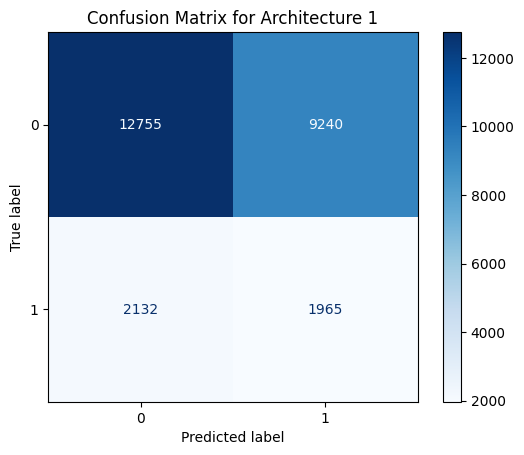

2
2

Training Architecture 2 with output activation: tanh, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7521 - loss: 0.9764 - val_accuracy: 0.7579 - val_loss: 0.6931
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4777 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4818 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4828 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4735 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4728 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4812 - loss: 0.6931 - val_accuracy: 0.7526 - val_loss: 0.6931
Epoch 8/25
666/66

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


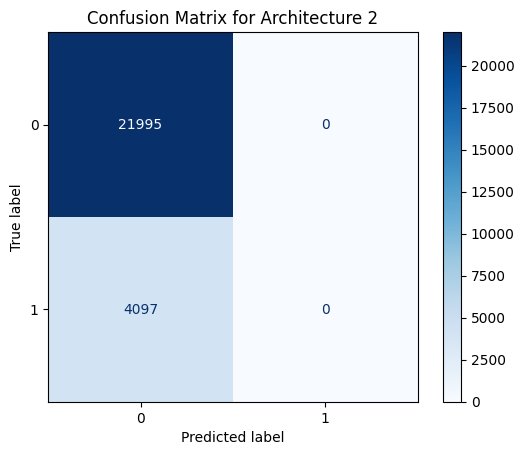

3
3

Training Architecture 3 with output activation: tanh, hidden activation: relu ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6874 - loss: 1.3582 - val_accuracy: 0.6828 - val_loss: 1.0282
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7016 - loss: 0.6993 - val_accuracy: 0.6837 - val_loss: 0.8530
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5601 - loss: 0.6455 - val_accuracy: 0.6362 - val_loss: 0.7965
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5524 - loss: 0.6249 - val_accuracy: 0.6140 - val_loss: 0.7148
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5419 - loss: 0.6097 - val_accuracy: 0.6134 - val_loss: 0.6552
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5239 - loss: 0.6092 - val_accuracy: 0.4399 - val_loss: 1.1900
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4170 - loss: 0.8042 - val_accuracy: 0.4226 - val_loss: 0.6305
Epoch 8/25
666/66

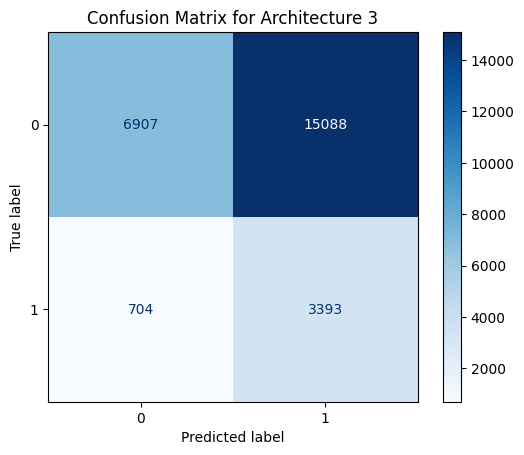

1
1

Training Architecture 1 with output activation: tanh, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5078 - loss: 1.3090 - val_accuracy: 0.5676 - val_loss: 0.6971
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4677 - loss: 0.6908 - val_accuracy: 0.5676 - val_loss: 0.6971
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4701 - loss: 0.6910 - val_accuracy: 0.5676 - val_loss: 0.6971
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4710 - loss: 0.6910 - val_accuracy: 0.5676 - val_loss: 0.6972
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4714 - loss: 0.6915 - val_accuracy: 0.5674 - val_loss: 0.6972
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4677 - loss: 0.6909 - val_accuracy: 0.5695 - val_loss: 0.6982
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4741 - loss: 0.6911 - val_accuracy: 0.5695 - val_loss: 0.6982
Epoch 8/25
666/6

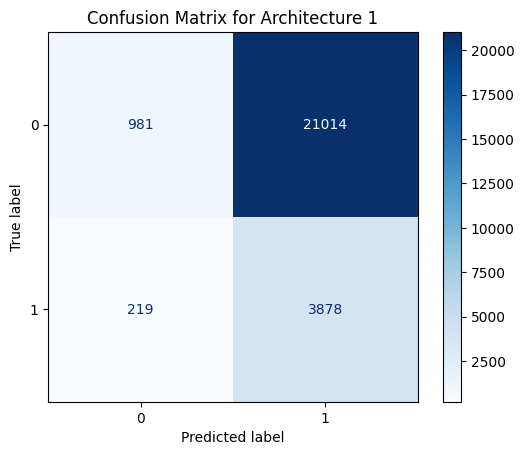

2
2

Training Architecture 2 with output activation: tanh, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6730 - loss: 1.3426 - val_accuracy: 0.7613 - val_loss: 0.6947
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7401 - loss: 0.7004 - val_accuracy: 0.7605 - val_loss: 0.6931
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7289 - loss: 0.6998 - val_accuracy: 0.7586 - val_loss: 0.6931
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7309 - loss: 0.6945 - val_accuracy: 0.7613 - val_loss: 0.6931
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7259 - loss: 0.6936 - val_accuracy: 0.7600 - val_loss: 0.6931
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7297 - loss: 0.6934 - val_accuracy: 0.7618 - val_loss: 0.6931
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7178 - loss: 0.6930 - val_accuracy: 0.7618 - val_loss: 0.6931
Epoch 8/25
666/6

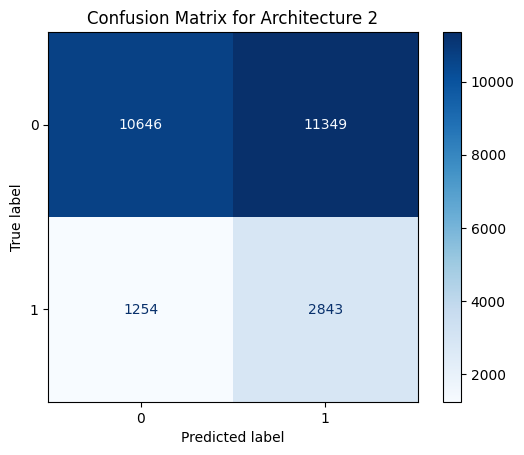

3
3

Training Architecture 3 with output activation: tanh, hidden activation: swish ...
Epoch 1/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6459 - loss: 1.5338 - val_accuracy: 0.7171 - val_loss: 1.6184
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6255 - loss: 1.0614 - val_accuracy: 0.7504 - val_loss: 1.2310
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6563 - loss: 0.9363 - val_accuracy: 0.7752 - val_loss: 0.9470
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7330 - loss: 0.8436 - val_accuracy: 0.7774 - val_loss: 0.8373
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7494 - loss: 0.7742 - val_accuracy: 0.7536 - val_loss: 0.8567
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7623 - loss: 0.7810 - val_accuracy: 0.6473 - val_loss: 1.0682
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7081 - loss: 0.9216 - val_accuracy: 0.7894 - val_loss: 0.7763
Epoch 8/25
666/6

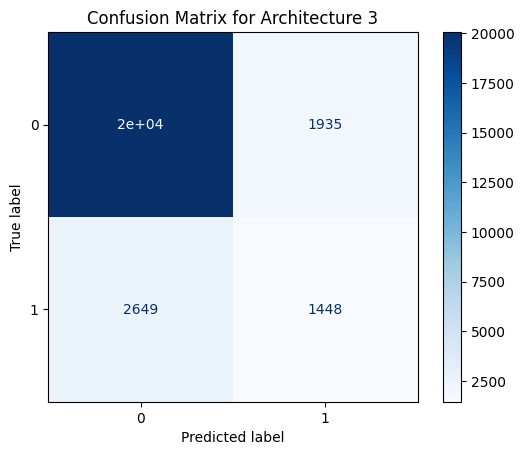

Architecture 1, Output Activation sigmoid, Hidden Activation relu, Accuracy: 0.88118964
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     21995
           1       0.66      0.49      0.57      4097

    accuracy                           0.88     26092
   macro avg       0.79      0.72      0.75     26092
weighted avg       0.87      0.88      0.87     26092

Architecture 2, Output Activation sigmoid, Hidden Activation relu, Accuracy: 0.87969493
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     21995
           1       0.67      0.46      0.55      4097

    accuracy                           0.88     26092
   macro avg       0.79      0.71      0.74     26092
weighted avg       0.87      0.88      0.87     26092

Architecture 3, Output Activation sigmoid, Hidden Activation relu, Accuracy: 0.87287291
               precision    recall  f1-score   support

           0       0.92 

In [11]:
dataset_path = "preprocessed_crime_data.csv"
activation_functions_outputlayer=['sigmoid','softmax','tanh']
activation_functions_hidden_layer=['relu','swish']
Info_String=""
for a_f_o in activation_functions_outputlayer:
  for a_f_h in activation_functions_hidden_layer:
    for i in range(1,4):
      print(i)
      Info_String+=deepLearningWithCNN(dataset_path, architectures=i, batch_size=32, epochs=25,activation_o=a_f_o,activation_h=a_f_h)
print(Info_String)